Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2 - Fundamentals of Computer Vision
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**ACTIVITY NO.** | **Assignment 5.2: Build and Apply Multilayer Perceptron**
**Name** | Dela Cruz, Irish
**Section** | CPE32S3
**Date Performed**: | 03/20/2024
**Date Submitted**: | 03/26/2024
**Instructor**: | Engr. Roman M. Richard

<hr>


# OBJECTIVES

In this assignment, you are task to build a multilayer perceptron model. The following are the requirements:

* Choose any dataset
* Explain the problem you are trying to solve  
* Create your own model
* Evaluate the accuracy of your model  

Note: Submit a PDF, the dataset and the notebook you used for this assignment.

# REQUIRED RESOURCES

*   PC / Laptop with Internet Access
*   **Python libraries:** pandas, numpy, matplotlib.pyplot, and seaborn.
*  **Datafiles:** heart.csv
*   Link of dataset: https://www.kaggle.com/code/mragpavank/heart-disease-uci



# SCENARIO / BACKGROUND

The Heart Disease UCI dataset contains the following variables such as age, sex, chest pain (cp), resting blood pressure (trestbps), serum cholesterol levels (chol), fasting blood sugar level (fbs), resting electrocardiogram (restecg), max. heart rate(thalac), exercise-induced angina (exang), ST depression induced by exercise (oldpeak), peak exercise ST segment (slope), No. of major vessels colored by fluoroscopy (ca), thallium stress test(thal), & presence of heart disease(pred_attribute).

**The target variable will be "the pred_attribute" since my goal here is to create a model that predict whether the patient has** **a heart disease or not by labeling it as 0 - absence and 1**.




# Data Exploration
*  Importing the libraries and dataset
*  Head(), Tail(), Info()
*  Visualization using Histogram







In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = pd.read_csv("/content/heart.csv", na_values="?")
dataset.rename(columns={"target": "pred_attribute"}, inplace=True)

In [3]:
# Replacing the value 1,2,3,4 to 1 to distinguish betweem presence (1) and absence (0) of heart disease
dataset["pred_attribute"].replace(inplace=True, value=[1, 1, 1, 1], to_replace=[1, 2, 3, 4])

np_dataset = dataset.to_numpy()

feature_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [ ]:
dataset.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_attribute
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
dataset.tail(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred_attribute
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             303 non-null    int64  
 1   sex             303 non-null    int64  
 2   cp              303 non-null    int64  
 3   trestbps        303 non-null    int64  
 4   chol            303 non-null    int64  
 5   fbs             303 non-null    int64  
 6   restecg         303 non-null    int64  
 7   thalach         303 non-null    int64  
 8   exang           303 non-null    int64  
 9   oldpeak         303 non-null    float64
 10  slope           303 non-null    int64  
 11  ca              303 non-null    int64  
 12  thal            303 non-null    int64  
 13  pred_attribute  303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Analysis

As you can see above, each column has a complete no. of entries which ensures the statistical validity. It enables more robust explonatory data analysis (EDA)

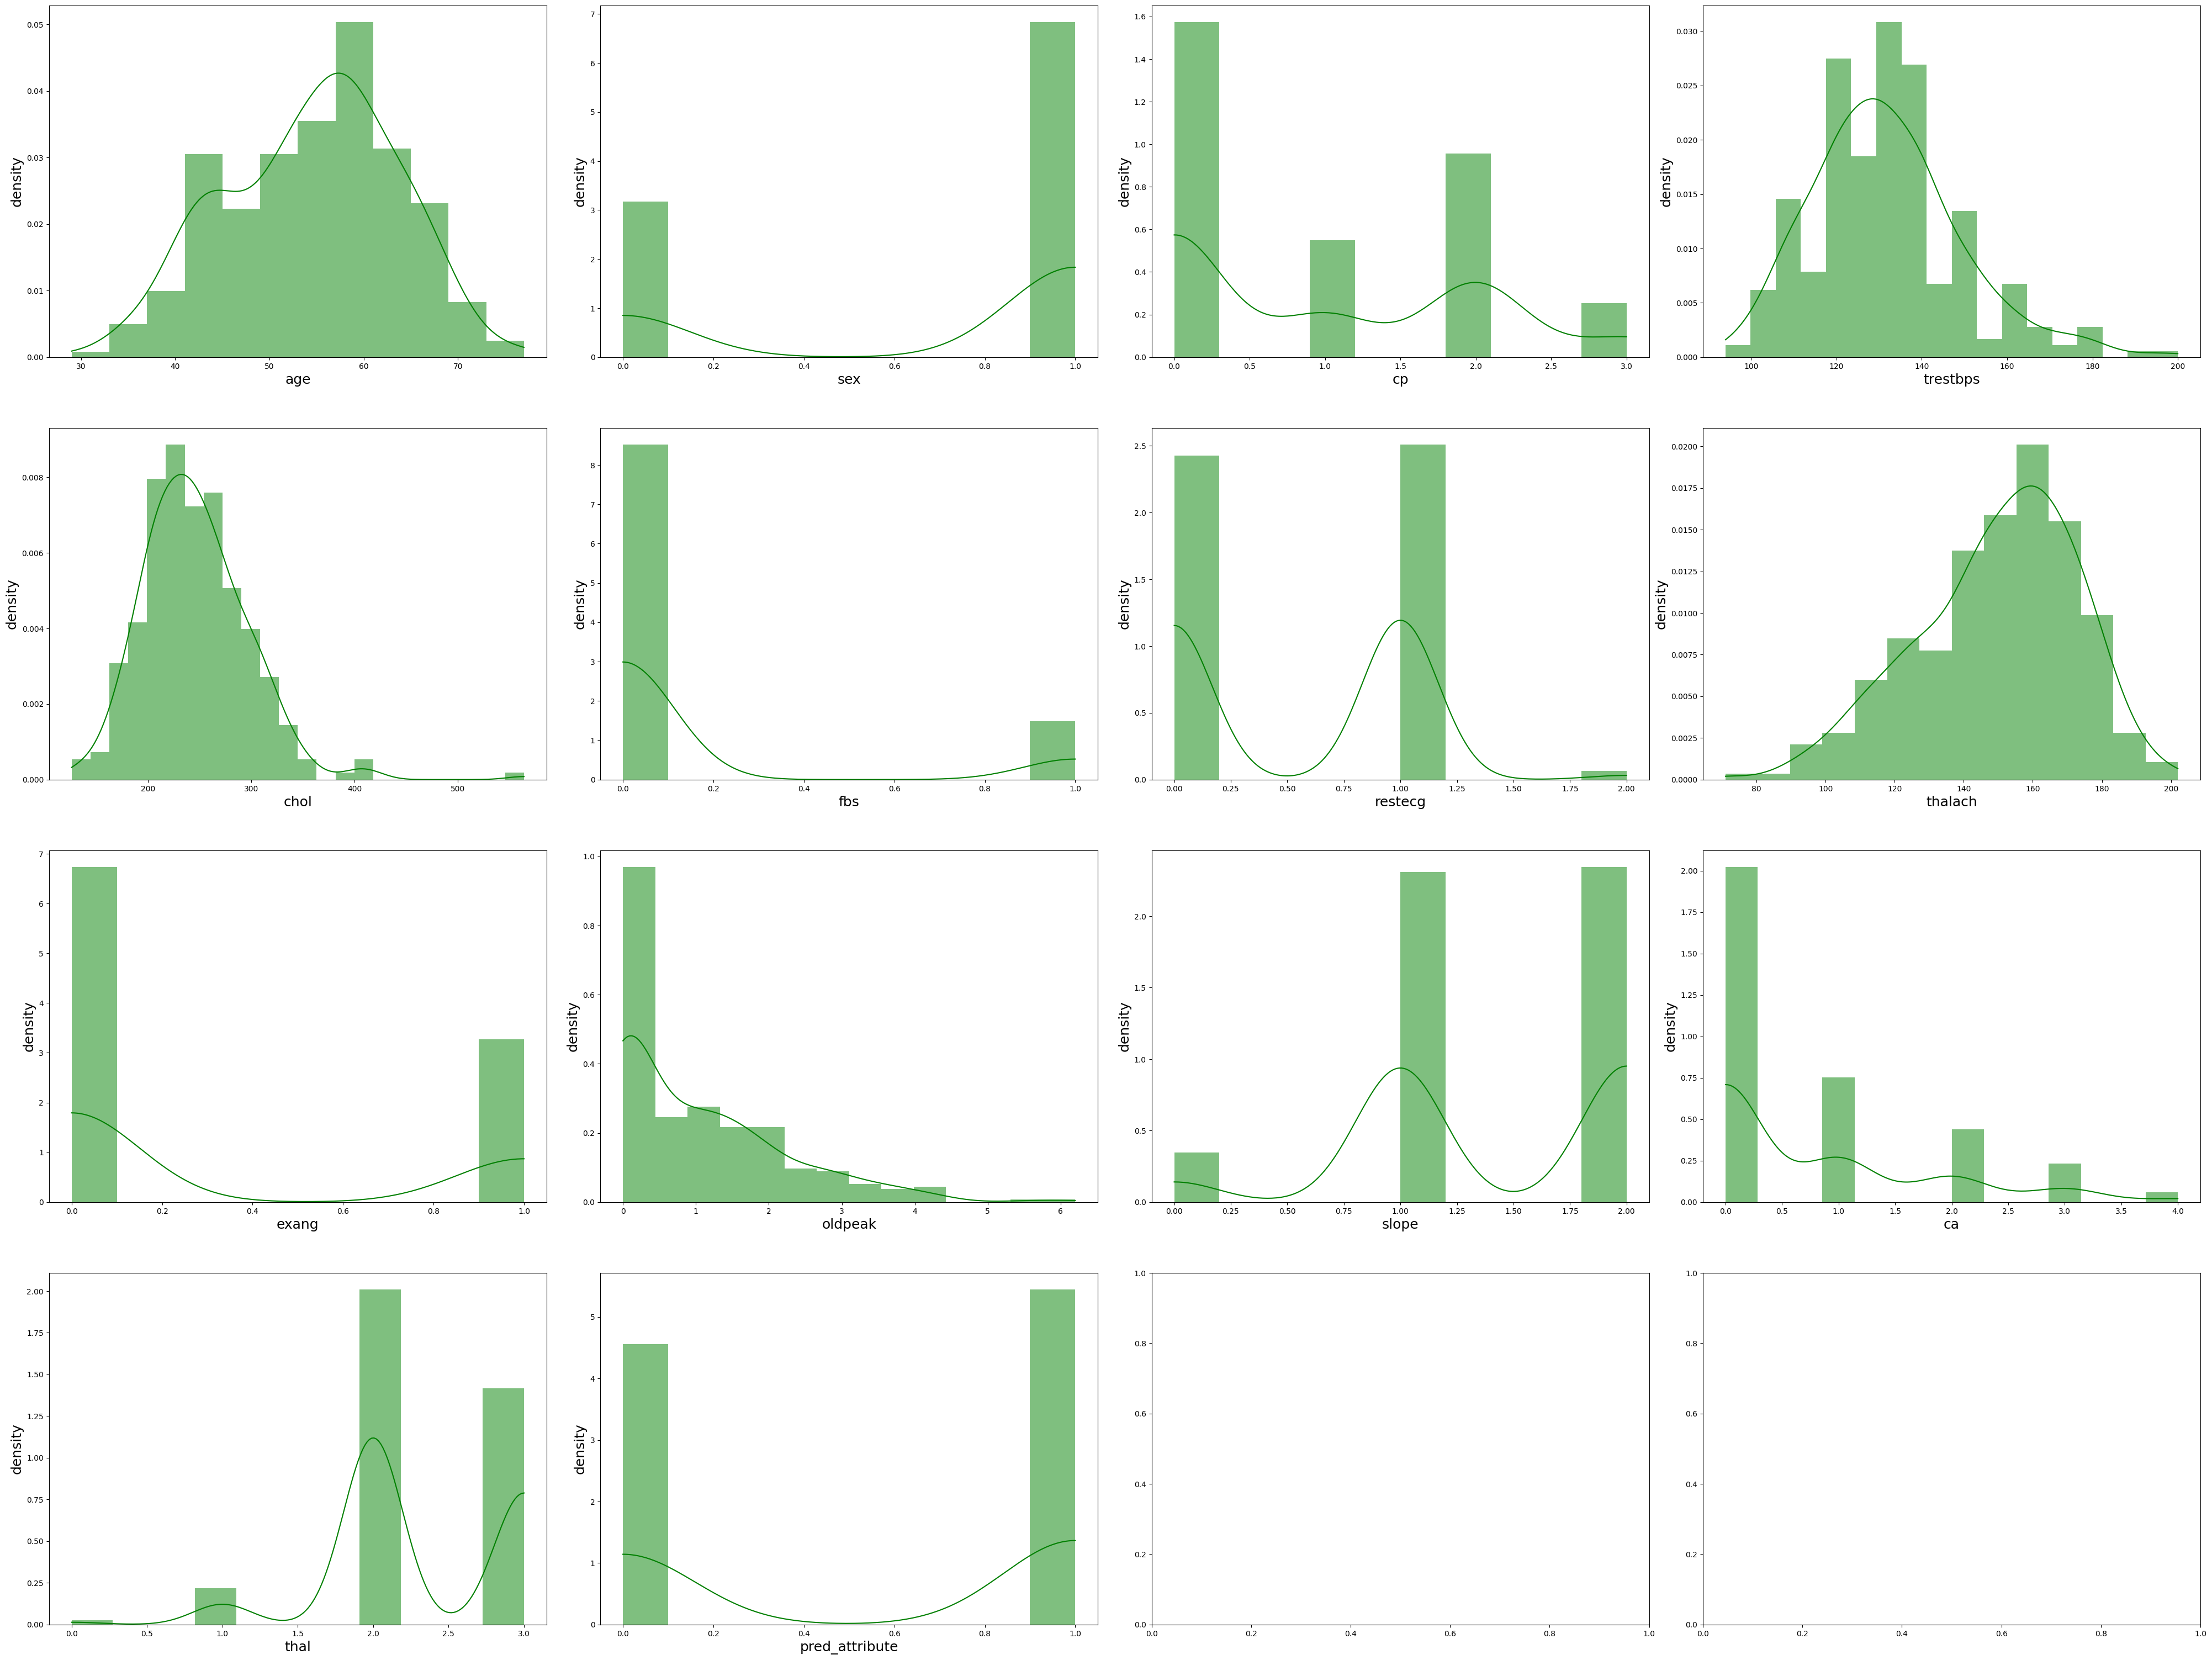

In [ ]:
fig, ax = plt.subplots(ncols=4, nrows=4, figsize=(40, 30))
index = 0
ax = ax.flatten()

for col, value in dataset.items():
    col_dist = sns.histplot(value, ax=ax[index], color='green', kde=True, stat="density", linewidth=0)
    col_dist.set_xlabel(col, fontsize=18)
    col_dist.set_ylabel('density', fontsize=18)
    index += 1

plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

# Analysis

As you can see above, that's the actual counts for each variable that presented by bar plot.  

<Axes: >

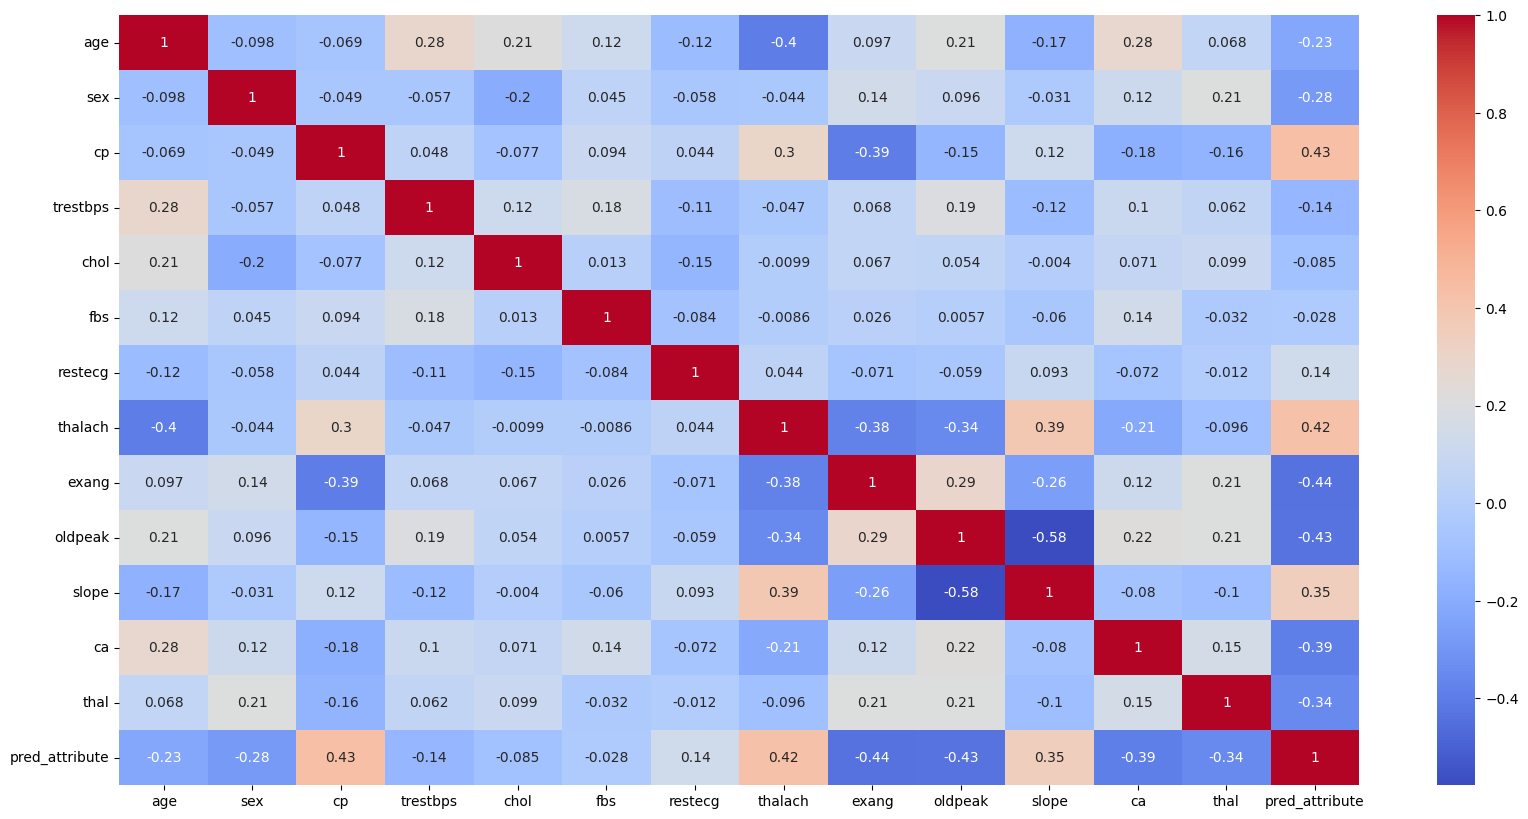

In [ ]:
correlation = dataset.corr()

plt.figure(figsize = (20, 10))
sns.heatmap(correlation, cmap = 'coolwarm', annot = True)

# Analysis
The Pearson Correlation plot indicated that there's no strongly correlated features. Which means it's good from a point of view of feeding these features into learning model since there's isn't much redundant or superfluous data in training set.

# Data Pre-Processing
*  Deal with missing values
*  Data Balancing
*  Statistics
*  Stratification
*  Training and Testing Sets
*  Prediction of Training and Testing Sets







In [65]:
dataset.isnull().sum()

age               0
sex               0
cp                0
trestbps          0
chol              0
fbs               0
restecg           0
thalach           0
exang             0
oldpeak           0
slope             0
ca                0
thal              0
pred_attribute    0
dtype: int64

In [5]:
#Counting the target value
dataset.dtypes
dataset['pred_attribute'].astype(int)
dataset['pred_attribute'].value_counts()

1    165
0    138
Name: pred_attribute, dtype: int64

In [6]:
Zero = dataset[dataset.pred_attribute == 0] # absence
One = dataset[dataset.pred_attribute == 1]  # presence

In [7]:
ZeroDS = Zero.sample(len(One), replace = True, random_state=100)
OneDB = pd.concat([ZeroDS, One])

In [8]:
count = OneDB['pred_attribute'].value_counts()
print(count)

0    165
1    165
Name: pred_attribute, dtype: int64


# Stratification

I cplit the dataset into training and testing dataset by selecting it randomly. There's an instances that class label 1 is many than class 2, but since I stratify the data, I have now a proportionate data for both classes of training and testing data.

In [32]:
X = dataset[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = dataset['pred_attribute']

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state= 50)

freqs = pd.DataFrame({"Training dataset": y_train.sum(),
                      "Test dataset":y_test.sum(),
                      "Total": y.sum()},
                     index=["Healthy", "Sick"])
freqs[["Training dataset", "Test dataset", "Total"]]

,Training dataset,Test dataset,Total
Healthy,113,52,165
Sick,113,52,165


# Analysis

The dataset available from UCI repository has 303 samples;the training and test datasets are randomly selected with 30% of the original dataset corresponding to test datasets. The proportion of the classes of interest (disease/sick) in both sets are check to be similar, ensuring a fair and reliable evaluation of model's performance

In [11]:
# Checking the accuracy
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 50)
model.fit(X_train, y_train)

print("Accuracy on training set: ", model.score(X_train, y_train))
print("Accuracy on test set: ", model.score(X_test, y_test))

Accuracy on training set:  0.8632075471698113
Accuracy on test set:  0.8241758241758241


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Analysis

The accuray for both training and testing set are approximately 86.32% and 82.42%. The Training Accuracy indicates a high training accuracy which means it learned the patterns present in training data. The Testing Accuracy indicates that the model is not overfitting excessively to the training data.  There's a minor performance drop between training and testing, it demonstrate robustness and generalization capablities.



# Confusion Matrix of training and test sets

Predict class labels for the training set

0 = Healthy

1 = Sick

In [12]:
pred_train = model.predict(X_train)
pd.crosstab(y_train, pred_train, rownames=['Predicted'], colnames=['Reality'], margins=True)

Reality,0,1,All
Predicted,,,
0,79,20,99
1,9,104,113
All,88,124,212


Predict class labels for the test set

0 = Healthy

1 = Sick

In [13]:
pred_test = model.predict(X_test)
pd.crosstab(y_test, pred_test, rownames=['Predicted'], colnames=['Reality'], margins=True)

Reality,0,1,All
Predicted,,,
0,25,14,39
1,2,50,52
All,27,64,91


# Model 1 - Multilayer Perceptron using Sequential model

The two links below was may basis to create a model for Multilayer Perceptron

Link: https://www.kaggle.com/code/rezasemyari/rice-image-classification-cnn-0-99

Link: https://colab.research.google.com/drive/1GL6gT3nJ0KFcEhY7-5k-8LMToLRceu-u?usp=sharing

In [112]:
from tensorflow import keras

features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                 'restecg','thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

input_shape = (13,)

cnn = keras.models.Sequential()
cnn.add(keras.layers.Dense(32, activation='relu', input_shape=input_shape))
cnn.add(keras.layers.Dense(64, activation='relu'))
cnn.add(keras.layers.Dropout(0.5))
cnn.add(keras.layers.Dense(1, activation='sigmoid'))

cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                     │ (None, 32)                  │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

# Analysis

These layers consist of dense that connected to each layer with different output shapes and parameter counts. There's a droupout layer to prevent overfitting by randomly dropping connections between neurons during training. The output layer is dense layer with single neuron, that suitable for binary classification task.

The total parameters of my model has 2,625 in total. All the parameters in my model are trainable. There are no non-trainable parameters in my model



In [113]:
cnn.compile(optimizer='adam',metrics=['accuracy'],loss='binary_crossentropy')

In [129]:
history = cnn.fit(X_train, y_train, epochs=100, shuffle=True,
                  batch_size=100,
                  validation_split=0.1)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7519 - loss: 0.4809 - val_accuracy: 0.9545 - val_loss: 0.3830
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.7758 - loss: 0.4631 - val_accuracy: 0.9091 - val_loss: 0.4067
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.7725 - loss: 0.4751 - val_accuracy: 0.9091 - val_loss: 0.4213
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7796 - loss: 0.4828 - val_accuracy: 0.9091 - val_loss: 0.4282
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.7963 - loss: 0.4230 - val_accuracy: 0.9091 - val_loss: 0.4258
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8270 - loss: 0.4274 - val_accuracy: 0.9091 - val_loss: 0.4248
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7828 - loss: 0.4486 - val_accuracy: 0.9091 - val_loss: 0.4214
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.7789 - loss: 0.4414 - val_accuracy: 0.9091 - val_lo

# Analysis

The  X and Y train here is for training data and label. I set the epoch as 100 so it passes 100 times to the entire dataset. I shuffle the training data before epoch. I also set the batch size as 100 it specifies the no. of samples that will propagated through the network before parameter update. Then 10% of training data is used for validation during training.

In [135]:
def plot(history):
    plt.plot(history.history['accuracy'], marker='o', color='red', markersize=3, label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], marker='*', color='green', markersize=4, label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], marker='o', color='red', markersize=3, label='Train Loss')
    plt.plot(history.history['val_loss'], marker='*', color='green', markersize=4, label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

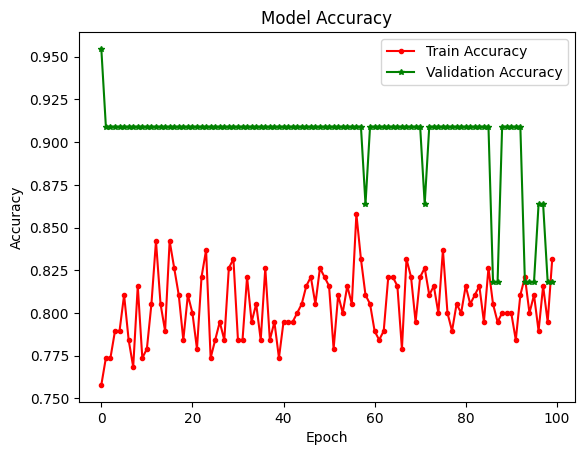

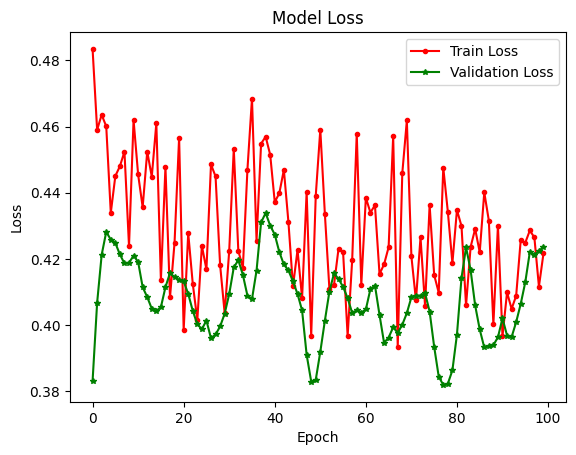

In [131]:
plot(history)

# Analysis

The model is performing well with high accuracy values, there's no significant sign of overfitting or underfitting, and the model seems to have converged after 60 epochs.

The model is learning effectively as the loss values decrease, but the Model Loss being higher than Train and Validation Loss suggests room for improvement. The model seems to have learned significantly from epoch 20 to 40, and continues to learn but at a slower rate.



In [132]:
test_loss, test_accuracy = cnn.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8246 - loss: 0.5249 
Test Loss: 0.557629406452179
Test Accuracy: 0.8131868243217468


# Analysis

The test lost is 0.5576 ir 55.76%, indicates the average on the test dataset that suggest its a better model performance. while the test accuracy is 81.32% indicating the proportion of correctly classified instances in the test dataset. Higher Accuracy tend to be a better model performance.


#Model 2 - Multilayer Perceptron using MPL Classifier

Link: https://machinelearninggeek.com/multi-layer-perceptron-neural-network-using-python/

In [133]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(13,),
                    random_state= 30,
                    verbose=True,
                    learning_rate_init=0.1)

clf.fit(X_train, y_train)

Iteration 1, loss = 16.49167880
Iteration 2, loss = 18.50856726
Iteration 3, loss = 12.30023900
Iteration 4, loss = 10.61451595
Iteration 5, loss = 15.24443155
Iteration 6, loss = 14.35528402
Iteration 7, loss = 1.95675672
Iteration 8, loss = 6.50566997
Iteration 9, loss = 2.53687880
Iteration 10, loss = 3.98257492
Iteration 11, loss = 0.59559400
Iteration 12, loss = 1.98352149
Iteration 13, loss = 0.75366662
Iteration 14, loss = 1.55428850
Iteration 15, loss = 0.57176106
Iteration 16, loss = 0.79651411
Iteration 17, loss = 0.52461267
Iteration 18, loss = 0.57110619
Iteration 19, loss = 0.58586196
Iteration 20, loss = 0.49703499
Iteration 21, loss = 0.49975262
Iteration 22, loss = 0.51242102
Iteration 23, loss = 0.49278057
Iteration 24, loss = 0.49484016
Iteration 25, loss = 0.50486753
Iteration 26, loss = 0.49982865
Iteration 27, loss = 0.49264510
Iteration 28, loss = 0.50794042
Iteration 29, loss = 0.50430247
Iteration 30, loss = 0.47868959
Iteration 31, loss = 0.47533806
Iteration 3

MLPClassifier(hidden_layer_sizes=(13,), learning_rate_init=0.1, random_state=30,
              verbose=True)

# Evaluation Report

In [134]:
#1st model - MPLCLassifier
from sklearn.metrics import accuracy_score

ypred =  clf.predict(X_test)
accuracy_score(y_test, ypred)

0.8021978021978022

## Analysis

The model was correctly classified about 80.22% of instances in the test dataset. While it's a good starting point, further analysis involve examining other evaluation and potential areas for model improvement

# Conclusion / Summary

Actually, searching for dataset and searching guide as basis here is quite a bit hard for me since I need to figure out how it work using python codes with importing appropriate libraries for the model of training and testing sets. I need to know the process in order for me to have insights on doing it. Overall, I encounter some errors but i learn how to fixed or solved it. The evaluation result of the model 1 was 81.31% and the second model was 80.23% which was a better model performance.